In [1]:
import tensorflow as tf
from donkey import Donkey
from model import Model
from meta import Meta
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_eval_tfrecords_file = 'data/test.tfrecords'
batch_size = 16

In [3]:
meta = Meta()
meta.load('data/tfrecords_meta.json')

In [6]:
images, labels = Donkey.build_batch(path_to_eval_tfrecords_file, batch_size=batch_size, num_examples=meta.num_test_examples, shuffled=False)
logits = Model.inference(images)
predictions = tf.argmax(logits, axis=1)

In [7]:
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

In [8]:
restorer = tf.train.Saver()
checkpoint_path = tf.train.latest_checkpoint('logs/train')
restorer.restore(sess, checkpoint_path)

In [9]:
predictions_val, images_val, labels_val = sess.run([predictions, images, labels])

In [10]:
idx = 1
image_val = images_val[idx] + 0.5
label_val = labels_val[idx]
prediction_val = predictions_val[idx]

3 (cat)
3 (cat)


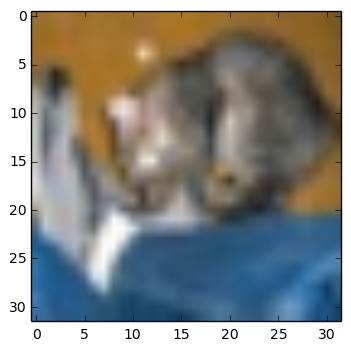

In [11]:
imshow(image_val)
print '%d (%s)' % (label_val, meta.categories[label_val])
print '%d (%s)' % (prediction_val, meta.categories[prediction_val])

In [12]:
coord.request_stop()
coord.join(threads)
sess.close()